For %increasing volume

In [81]:
from pandas import DataFrame

In [82]:
stock_market = {'Total posts change': [3.44,-0.46,-0.49,-0.01,-0.15],
'Basic Positive': [88,139,92,112,120],
'Basic Negative': [130,89,54,52,44],
'closing price': [40.080002,40.049999,40.349998,40.43,40.630001],
'closing price change': [-0.000996934,-0.000748578,0.007490612,0.001982701,0.004946846],               
'volume':[1759600,1298100,1164900,1574700,2115800]                
}

In [83]:
df = DataFrame(stock_market,columns=['Total posts change','Basic Positive','Basic Negative','closing price','closing price change','volume'])

In [84]:
df.corr(method ='pearson')

,Total posts change,Basic Positive,Basic Negative,closing price,closing price change,volume
Total posts change,1.000000,-0.585995,0.835376,-0.449358,-0.545625,0.341473
Basic Positive,-0.585995,1.000000,-0.260010,0.011825,-0.272245,0.021817
Basic Negative,0.835376,-0.260010,1.000000,-0.850670,-0.771408,-0.033644
closing price,-0.449358,0.011825,-0.850670,1.000000,0.715926,0.504198
closing price change,-0.545625,-0.272245,-0.771408,0.715926,1.000000,-0.084787
volume,0.341473,0.021817,-0.033644,0.504198,-0.084787,1.000000


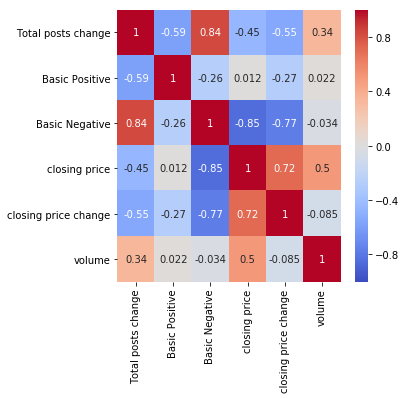

In [85]:
import matplotlib.pyplot as plt
matplotlib.use('Agg')
import pandas
import numpy
import seaborn as sns
plt.figure(figsize=(5,5))
sns_image=sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
fig = sns_image.get_figure()
fig.savefig("output.png")

In [86]:
print(df)

   Total posts change  Basic Positive  Basic Negative  closing price  \
0                3.44              88             130      40.080002   
1               -0.46             139              89      40.049999   
2               -0.49              92              54      40.349998   
3               -0.01             112              52      40.430000   
4               -0.15             120              44      40.630001   

   closing price change   volume  
0             -0.000997  1759600  
1             -0.000749  1298100  
2              0.007491  1164900  
3              0.001983  1574700  
4              0.004947  2115800  


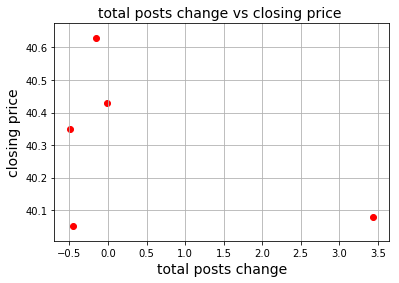

In [87]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(df['Total posts change'], df['closing price'], color='red')
plt.title('total posts change vs closing price ', fontsize=14)
plt.xlabel('total posts change', fontsize=14)
plt.ylabel('closing price', fontsize=14)
plt.grid(True)
plt.show()

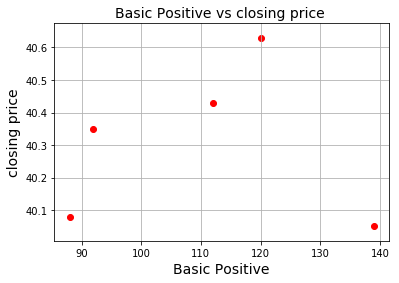

In [88]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(df['Basic Positive'], df['closing price'], color='red')
plt.title('Basic Positive vs closing price ', fontsize=14)
plt.xlabel('Basic Positive', fontsize=14)
plt.ylabel('closing price', fontsize=14)
plt.grid(True)
plt.show()

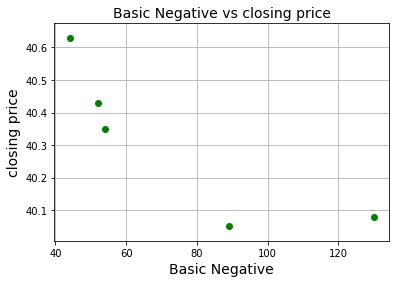

In [89]:
import matplotlib
from matplotlib import pyplot as plt
plt.scatter(df['Basic Negative'], df['closing price'], color='green')
plt.title('Basic Negative vs closing price', fontsize=14)
plt.xlabel('Basic Negative', fontsize=14)
plt.ylabel('closing price', fontsize=14)
plt.grid(True)
plt.show()

In [90]:
X = df[['Basic Negative','Total posts change']] 
Y = df['closing price']

In [91]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

In [92]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 41.04025120790055
Coefficients: 
 [-0.01071873  0.1261612 ]


In [94]:
New_Basic_Negative = 300
New_Total_posts_change = 0.3
print ('Predicted closing price: \n', regr.predict([[New_Basic_Negative ,New_Total_posts_change]]))

Predicted closing price: 
 [37.86248035]


In [95]:
X = sm.add_constant(X)

C:\Users\Kartik.sharma5\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [96]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [97]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          closing price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 11 Jun 2019   Prob (F-statistic):             0.0504
Time:                        19:08:40   Log-Likelihood:                 7.9760
No. Observations:                   5   AIC:                            -9.952
Df Residuals:                       2   BIC:                            -11.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 41.0403      0

C:\Users\Kartik.sharma5\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [ ]:
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# tkinter GUI
root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
image = tk.PhotoImage(file="output.png")
label_model = tk.Label(image=image)
label_model.pack()
canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Basic negative ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type total posts change ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Basic_negative #our 1st input variable
    New_Basic_negative = float(entry1.get()) 
    
    global New_total_posts_change #our 2nd input variable
    New_total_posts_change = float(entry2.get()) 
    
    Prediction_result  = ('Predicted closing Price: ', regr.predict([[New_Basic_negative ,New_total_posts_change]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict closing Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 

root.mainloop()